In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import geopandas as gpd
from datetime import datetime
import seaborn as sns
import warnings
import numpy as np
warnings.filterwarnings('ignore')
import plotly.express as px
# https://www.python-graph-gallery.com/
# https://plotly.github.io/plotly.py-docs/generated/plotly.express.choropleth.html

In [2]:
import time
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_openml
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import matthews_corrcoef
from sklearn.manifold import MDS
import umap.umap_ as umap

In [90]:
df = pd.read_csv("datasets/iris.csv")
df

,sepal length,sepal width,petal length,petal width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


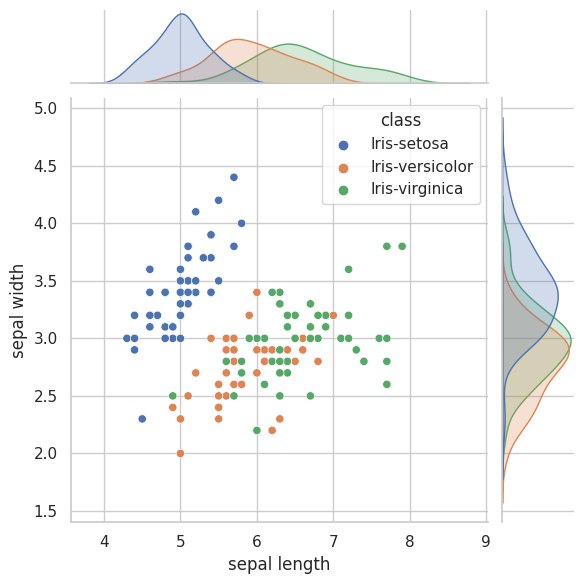

In [91]:
#sns.set_theme(style="whitegrid")
fig = sns.jointplot(x="sepal length", y="sepal width", hue="class", data=df, kind="scatter", joint_kws={ "marker":"o"})
color= ["#7fc97f", "#386cb0", "#ff7f00"]

plt.show()


In [5]:
us_state_to_abbrev = {
    "Alabama": "AL",
    "Alaska": "AK",
    "Arizona": "AZ",
    "Arkansas": "AR",
    "California": "CA",
    "Colorado": "CO",
    "Connecticut": "CT",
    "Delaware": "DE",
    "Florida": "FL",
    "Georgia": "GA",
    "Hawaii": "HI",
    "Idaho": "ID",
    "Illinois": "IL",
    "Indiana": "IN",
    "Iowa": "IA",
    "Kansas": "KS",
    "Kentucky": "KY",
    "Louisiana": "LA",
    "Maine": "ME",
    "Maryland": "MD",
    "Massachusetts": "MA",
    "Michigan": "MI",
    "Minnesota": "MN",
    "Mississippi": "MS",
    "Missouri": "MO",
    "Montana": "MT",
    "Nebraska": "NE",
    "Nevada": "NV",
    "New Hampshire": "NH",
    "New Jersey": "NJ",
    "New Mexico": "NM",
    "New York": "NY",
    "North Carolina": "NC",
    "North Dakota": "ND",
    "Ohio": "OH",
    "Oklahoma": "OK",
    "Oregon": "OR",
    "Pennsylvania": "PA",
    "Rhode Island": "RI",
    "South Carolina": "SC",
    "South Dakota": "SD",
    "Tennessee": "TN",
    "Texas": "TX",
    "Utah": "UT",
    "Vermont": "VT",
    "Virginia": "VA",
    "Washington": "WA",
    "West Virginia": "WV",
    "Wisconsin": "WI",
    "Wyoming": "WY",
    "District of Columbia": "DC",
    "American Samoa": "AS",
    "Guam": "GU",
    "Northern Mariana Islands": "MP",
    "Puerto Rico": "PR",
    "United States Minor Outlying Islands": "UM",
    "U.S. Virgin Islands": "VI",
}

In [70]:
df = pd.read_csv("datasets/states_vote.tsv")
dfgeo = pd.read_csv("datasets/states_geo.tsv")
dfgeo # state 	fips 	pop 	gdp 	poverty
df # state 	stateid X Y EV dem_votes rep_votes other_votes dem_this_margin margin_shift called final Total 2016 Votes


dfgeo["state_code"] = [ us_state_to_abbrev[x] for x in dfgeo.state] 
avg_poverty = dfgeo["poverty"].sum() / dfgeo.shape[0]
dfgeo["pclass"] = [ "H" if x >= avg_poverty else "L" for x in dfgeo["poverty"]]
dfgeo["maj_votes"] = df["called"]




#print(dfgeo)

colors = ['#fef1e4', '#fab186', '#f3742d',  '#97d0e7', '#b0988c', '#ab5f37', '#18aee5', '#407b8f', '#5c473d']
        #l,m,h:
c_low_rep = "#3288bd"
c_low_dem = "#abdda4"
c_high_rep = "#fee08b"
c_low_dem = "#d53e4f"

#the jbest way to crate a bivariate choropleth map is to create a custom class combining the two features

#for the us states you can just use these
fig = px.choropleth(dfgeo,          
                    locations=dfgeo.state_code, 
                    locationmode="USA-states", 
                    color="maj_votes", 
                    scope="usa",
                    #color_continuous_scale=px.colors.sequential.Plasma
                   
                    )



fig.show()

